<a href="https://colab.research.google.com/github/chrlatte/babies/blob/main/babies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.2 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

dataset = load_dataset("Rafeq/Awake_or_sleep")

Extracting data files: 0it [00:00, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset imagefolder downloaded and prepared to /root/.cache/huggingface/datasets/Rafeq___imagefolder/Rafeq--Awake_or_sleep-75dd694064cf9f79/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]


resources:
- https://towardsdatascience.com/binary-image-classification-in-pytorch-5adf64f8c781
- https://colab.research.google.com/drive/1RsucgExe71IRFmzGrp5kUg7s_tg31EhE?authuser=1#scrollTo=looking-lightning
- https://discuss.pytorch.org/t/batch-must-contain-tensors-numpy-arrays-numbers-dicts-or-lists-found-class-pil-image-image/85669




In [8]:
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from datasets.dataset_dict import DatasetDict
from torch.utils.data import Dataset
import torchvision.transforms as transforms


In [9]:
initial_train_set, valid_set = dataset['train'].train_test_split(test_size=0.3).values()

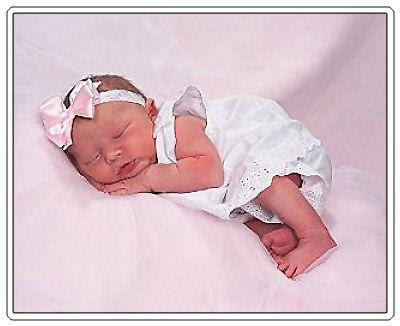

In [ ]:
(train_set[4])['image']

In [10]:
class ImageDataset(Dataset):
    def __init__(self, dataset, transform=None, train=False):
        self.dataset = dataset
        # self.features = dataset.features.keys()
        self.transform = transform
        self.train = train

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        row = self.dataset[idx]
        image = row['image']
        label = row['label']
        if self.transform:
            image = self.transform(image)
        return image[:3, :, :], label

    # def __repr__(self):
    #     return self.dataset.__repr__()

Normalizing:
- https://www.geeksforgeeks.org/how-to-normalize-images-in-pytorch/#
- https://stackoverflow.com/questions/53735817/normalising-images-before-learning-in-pytorch

In [11]:
train_transform = transforms.Compose([transforms.Resize((320,320)),
                                      transforms.ToTensor() ]) # TODO: eventually want to normalize, and also possibly flip or rotate


In [12]:
train_set = ImageDataset(initial_train_set, transform = train_transform, train = True)
train_set

In [13]:
valid_transform = train_transform # for now, they are the same
valid_set = ImageDataset(valid_set, transform=valid_transform, train=False)

In [14]:
print(f"train set: {len(train_set)} items")
print(f"valid set: {len(valid_set)} items")

train set: 142 items
valid set: 62 items


## Display Images:

torch.Size([3, 320, 320])
this baby is awake


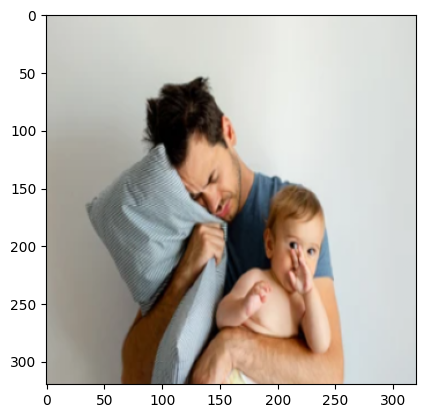

In [15]:
for img, label in train_set:
  print(img.shape)
  plt.imshow(img.permute(1, 2, 0))

  if label == 1: label = "asleep"
  else: label = "awake"

  print(f"this baby is {label}")

  break

In [16]:
for img, label in train_set:
  break

print(type(img))

<class 'torch.Tensor'>


In [17]:
# for img, label in train_set:
#   print(img.shape[0])

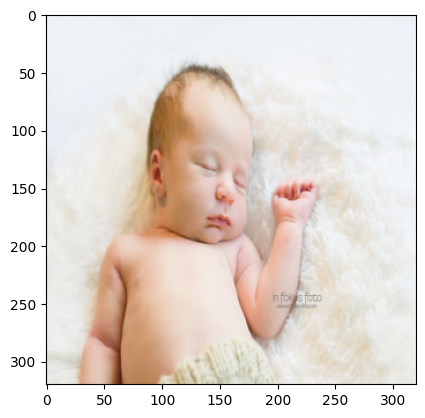

In [18]:
image, label = train_set[11]
plt.imshow(image.permute(1, 2, 0))

## Load Data into batches:

In [19]:
# use dataloader to load data into batches
from torch.utils.data import DataLoader

In [20]:
train_dataloader = DataLoader(train_set, batch_size=16, shuffle = True)
valid_dataloader = DataLoader(valid_set, batch_size=16, shuffle = True)

In [21]:
print(f"total number of bathces in trainloader {len(train_dataloader)}")
print(f"total number of bathces in validloader {len(valid_dataloader)}")


total number of bathces in trainloader 9
total number of bathces in validloader 4


In [22]:
for image_batch, label_batch in train_dataloader:
  break

print(image_batch.shape)
print(label_batch.shape)

torch.Size([16, 3, 320, 320])
torch.Size([16])


In [ ]:
# TODO: try using resnet pre-trained model


In [ ]:
# Going to try two methods:
# 1. use a pre-trained model (resnet) and do transfer learning
# 2. train a model from stratch


In [23]:
# METHOD1:

from torchvision import models
device = "cuda"
model = models.resnet18(pretrained=True)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


In [24]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Create new network: